In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\khush\\Downloads\\ai_job_market_insights.csv")
print(df.head())


               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2             Yes         

In [2]:
#checking missing values 
print("Missing values per coumn:\n",df.isnull().sum())

print(df.info())


Missing values per coumn:
 Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Grow

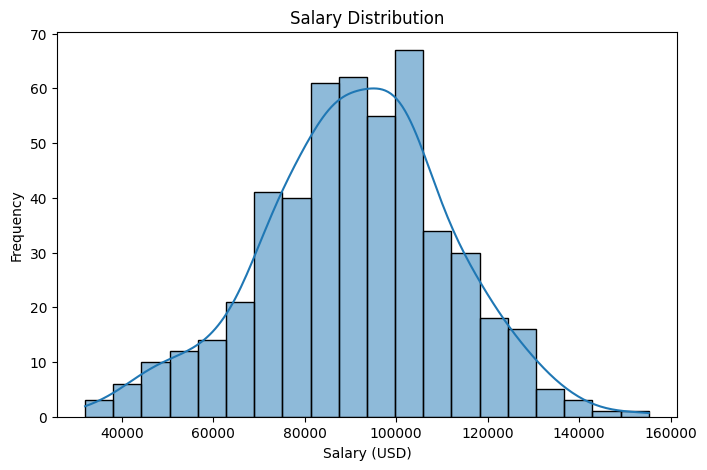

In [3]:
# Plot the salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary_USD'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

***Job_Title***


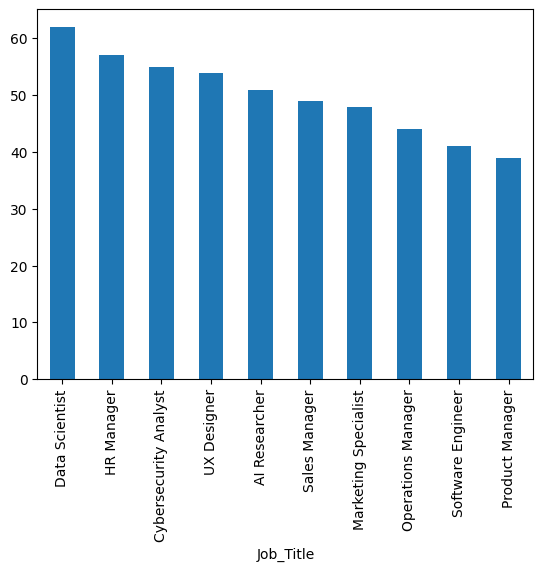

***Industry***


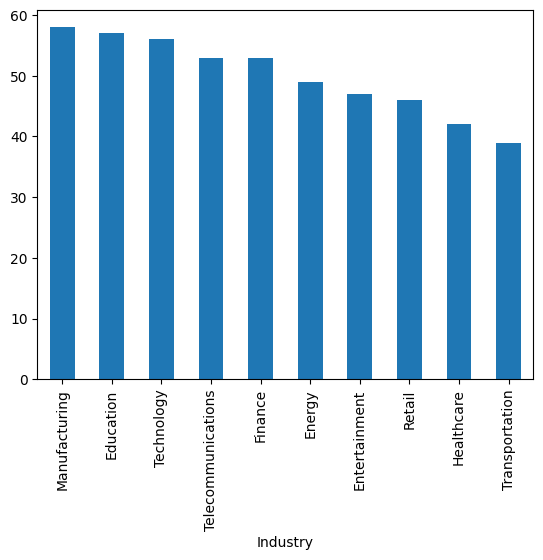

***Company_Size***


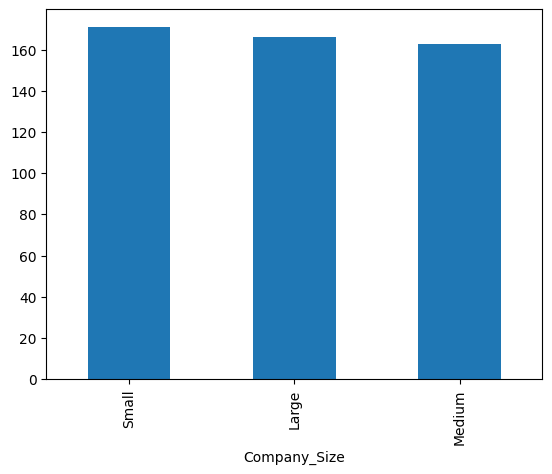

***Location***


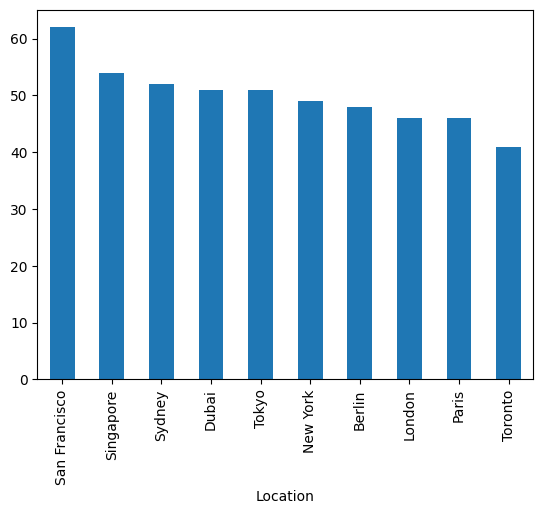

***AI_Adoption_Level***


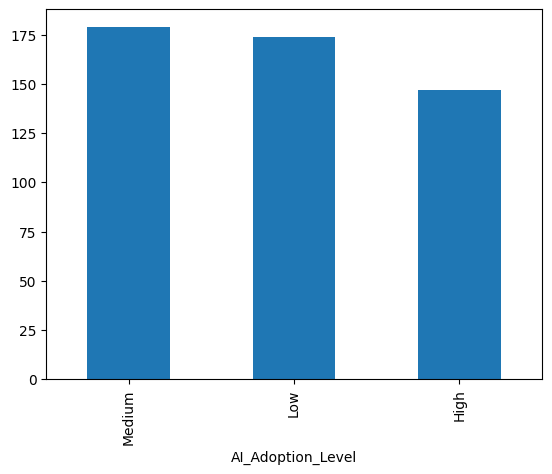

***Automation_Risk***


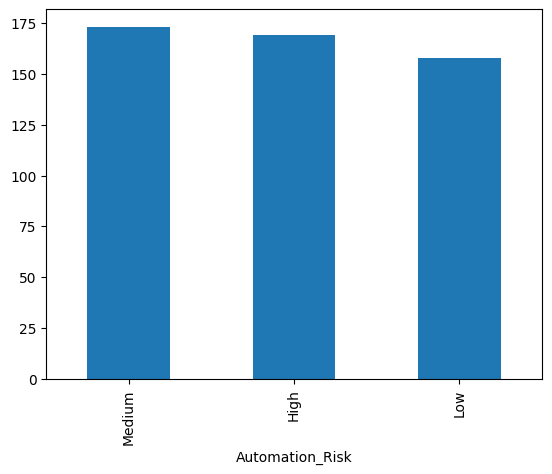

***Required_Skills***


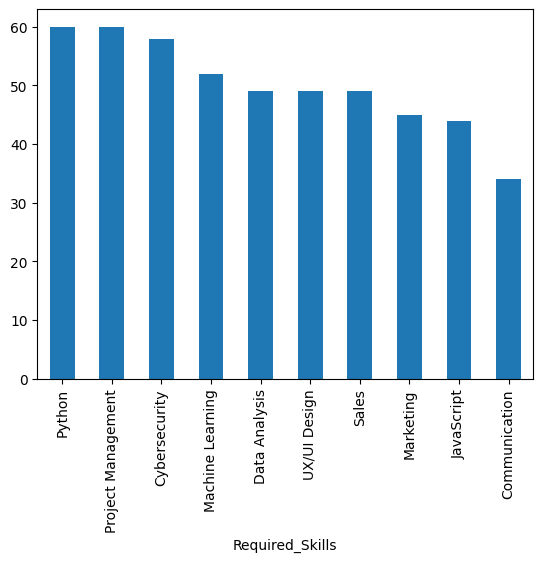

***Remote_Friendly***


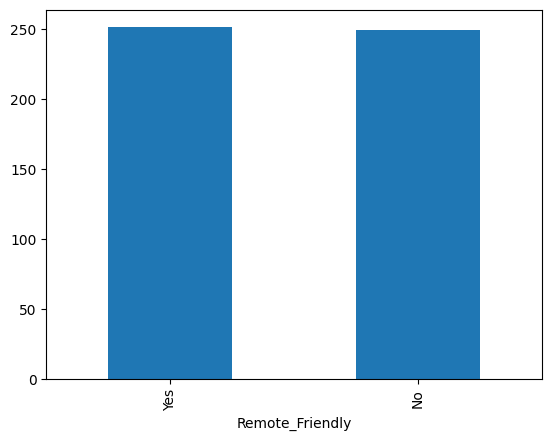

***Job_Growth_Projection***


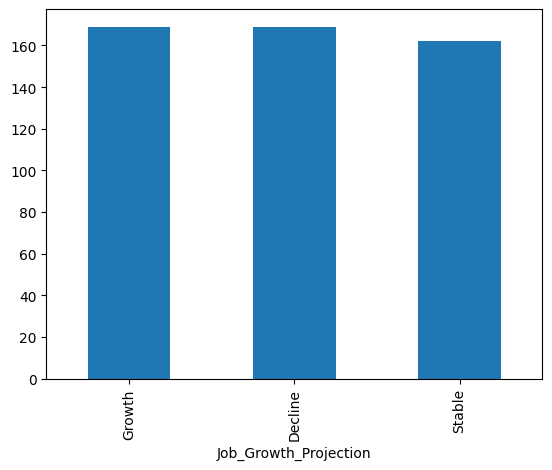

In [4]:
# Details of each column separately
for i in df.columns:
    if i != 'Salary_USD':
        print('***'+i+'***')
        df[i].value_counts().plot(kind='bar')
        plt.show()

In [10]:
# Print summary statistics for the Salary_USD column
print("Summary Statastics:\n",df.Salary_USD.describe())

Summary Statastics:
 count       500.000000
mean      91222.390974
std       20504.291453
min       31969.526346
25%       78511.514863
50%       91998.195286
75%      103971.282092
max      155209.821614
Name: Salary_USD, dtype: float64


In [9]:
# Calculate the threshold for unusually high salaries
high_salary_threshold = df.Salary_USD.mean() + (3 * df.Salary_USD.std())
print("\nThreshold for Unusually High Salaries:\n", high_salary_threshold)


Threshold for Unusually High Salaries:
 152735.26533454677


In [11]:
# Display the rows with salaries above the calculated threshold
print("\nSalaries Above the Threshold:\n", df[df.Salary_USD > high_salary_threshold])


Salaries Above the Threshold:
                 Job_Title Industry Company_Size       Location  \
420  Marketing Specialist  Finance       Medium  San Francisco   

    AI_Adoption_Level Automation_Risk Required_Skills     Salary_USD  \
420              High            High           Sales  155209.821614   

    Remote_Friendly Job_Growth_Projection  
420             Yes               Decline  


In [12]:
# Calculate the threshold for unusually low salaries
low_salary_threshold = df.Salary_USD.mean() - (3 * df.Salary_USD.std())
print("\nThreshold for Unusually Low Salaries:\n", low_salary_threshold)


Threshold for Unusually Low Salaries:
 29709.51661368012


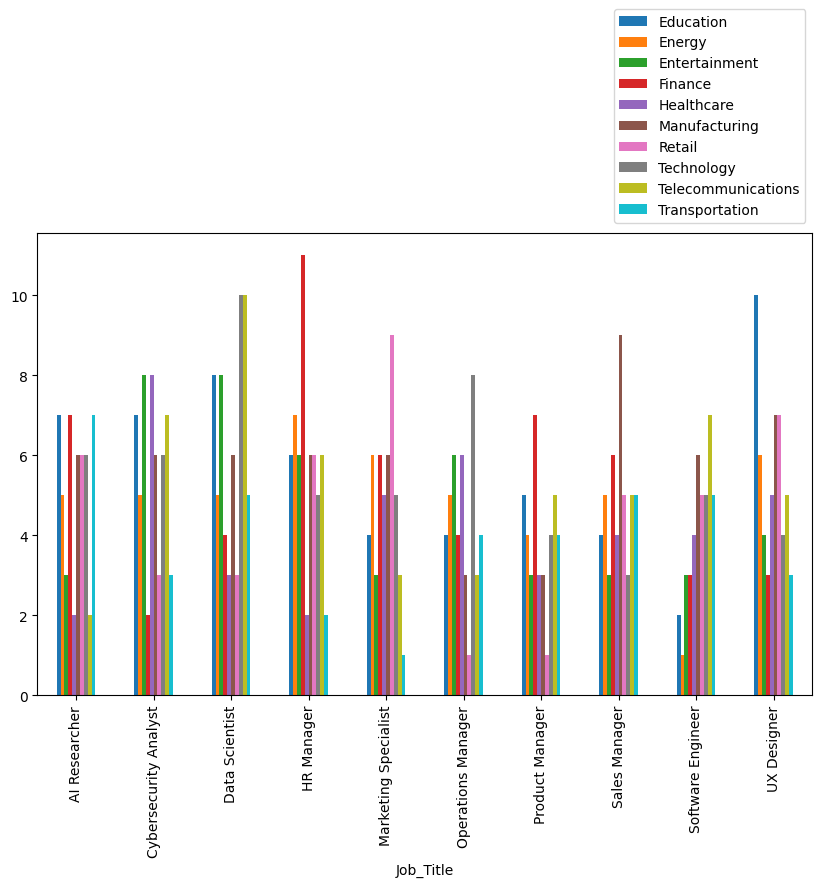

In [13]:
# The industry in which the job is located in relation to the job title.
pd.crosstab(df.Job_Title , df.Industry).plot(kind='bar' , figsize=(10,6))
plt.legend(bbox_to_anchor=(1, 1.5))
plt.show()


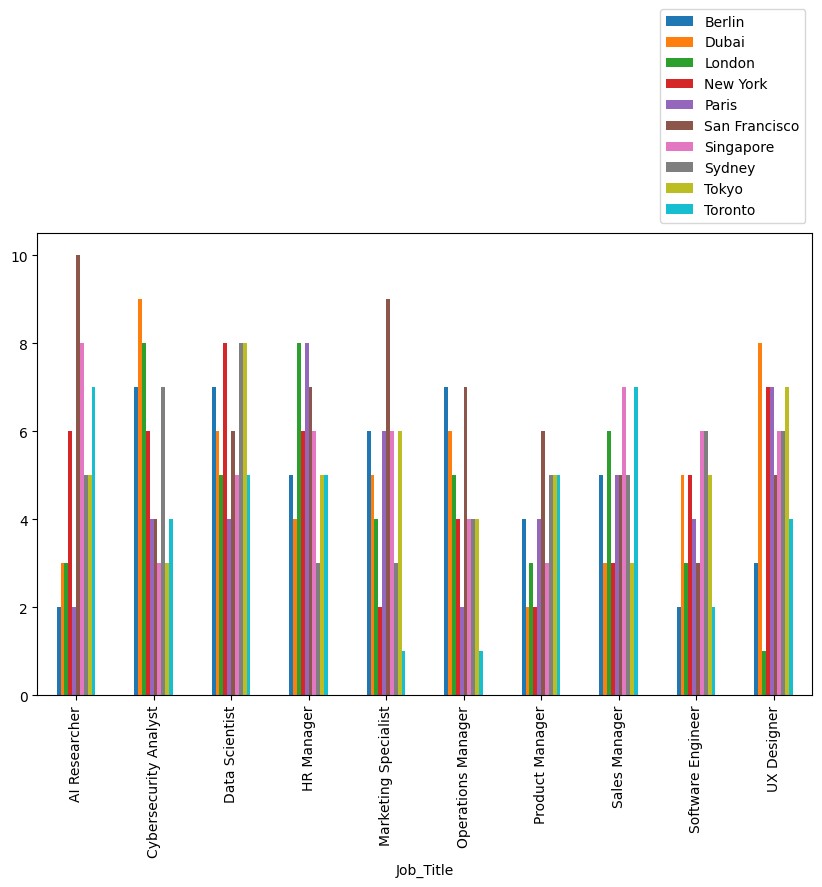

In [14]:
#Work Loaction of each job
pd.crosstab(df.Job_Title, df.Location).plot(kind='bar',figsize=(10,6))
plt.legend(bbox_to_anchor=(1, 1.5))
plt.show()

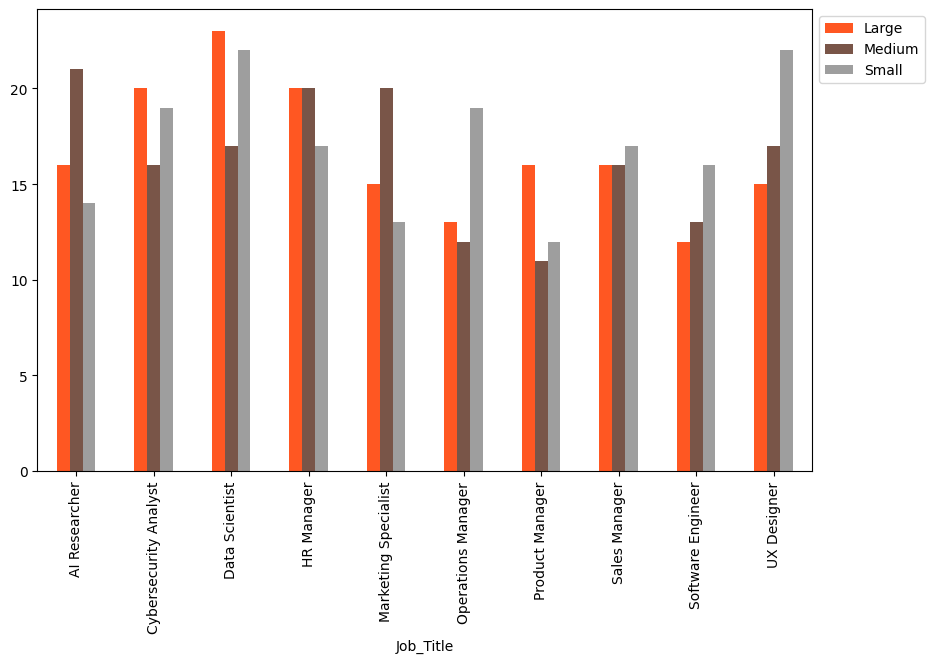

In [15]:
#The size of companies that offer each guest
pd.crosstab(df.Job_Title,df.Company_Size).plot(kind='bar',figsize=(10,6),color=['#FF5722','#795548','#9E9E9E'])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

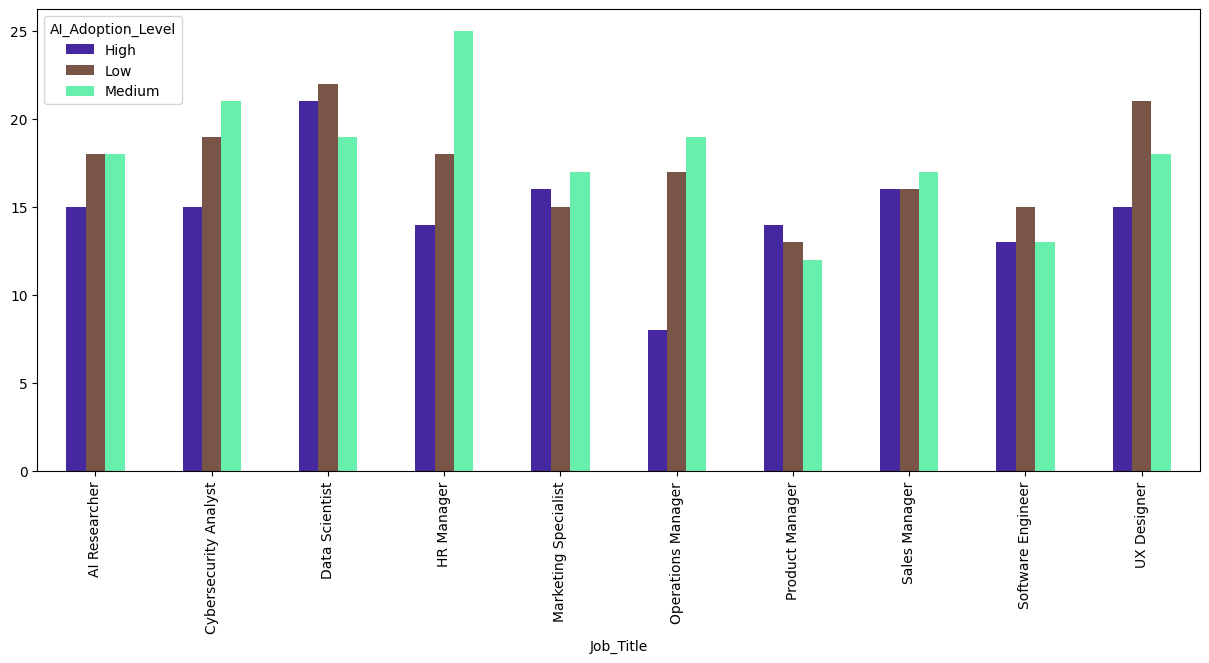

In [16]:
#The extent to which the company relies on each function on artificial intelligence
pd.crosstab(df.Job_Title , df.AI_Adoption_Level).plot(kind='bar' , figsize=(15,6) ,color=['#4527A0','#795548','#68EFAD'])
plt.show()

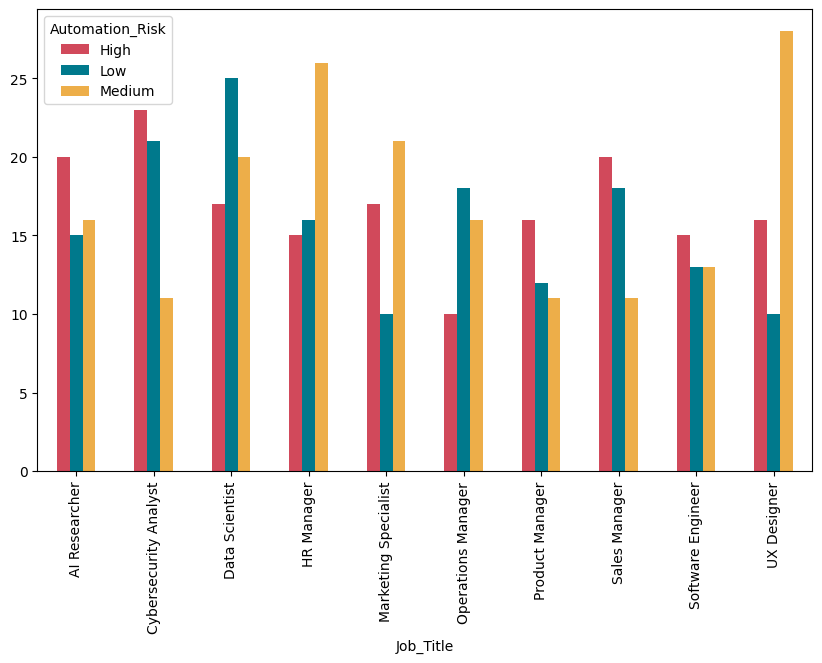

In [17]:
#The estimated risk of job automation within the next ten years for each job
pd.crosstab(df.Job_Title , df.Automation_Risk).plot(kind='bar' , figsize=(10,6)  ,color=['#d1495b','#00798c','#edae49'])
plt.show()

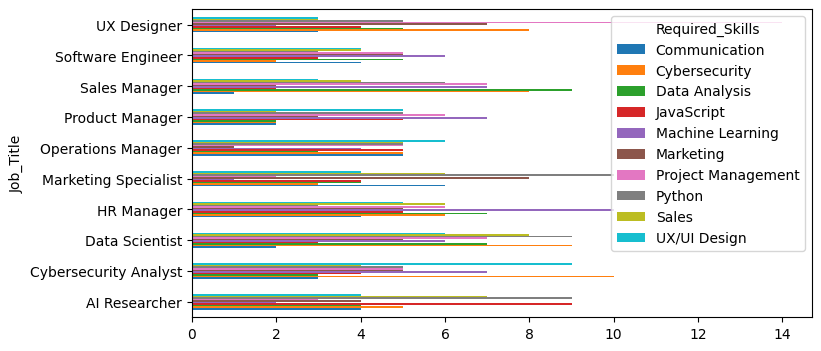

In [18]:
 # The basic skills required for each job role
pd.crosstab(df.Job_Title, df.Required_Skills).plot(kind='barh', figsize=(8,4))
plt.show()

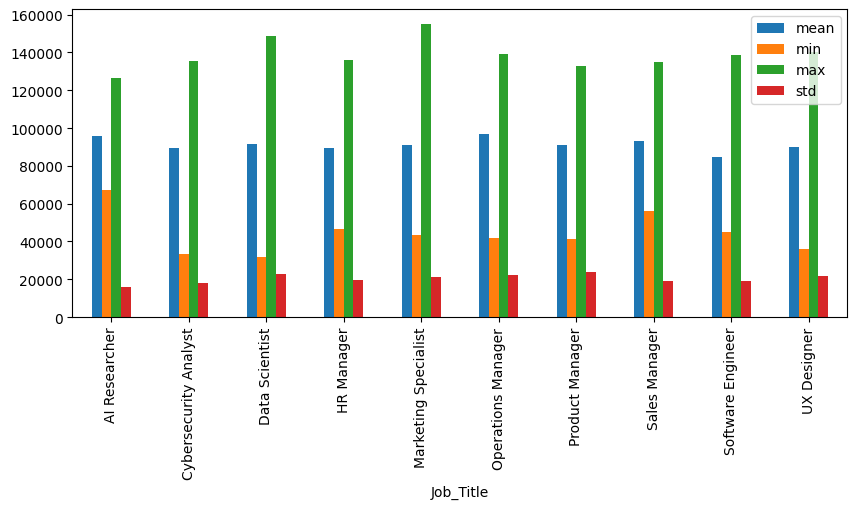

In [19]:
#Details of the annual salary offered for the position in US dollars for each position 
df.groupby('Job_Title').Salary_USD.agg(['mean','min','max','std']).plot(kind='bar',figsize=(10,4))
plt.show()

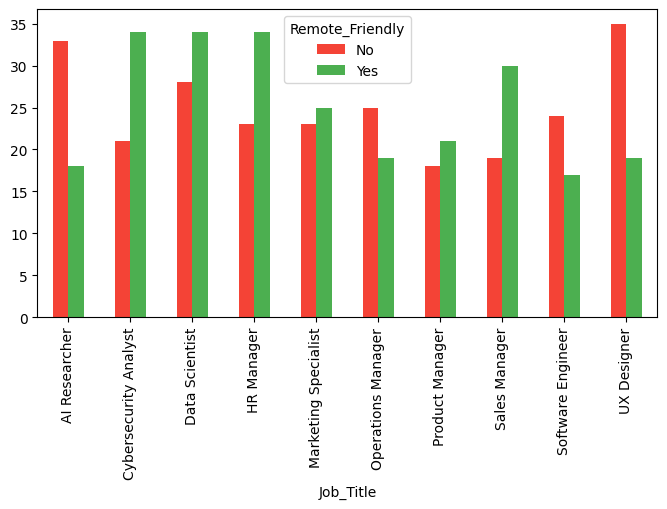

In [20]:
#Wheather the task can be performed remotely for each job 
pd.crosstab(df.Job_Title,df.Remote_Friendly).plot(kind='bar',figsize=(8,4),color=['#F44336' ,'#4CAF50'])
plt.show()

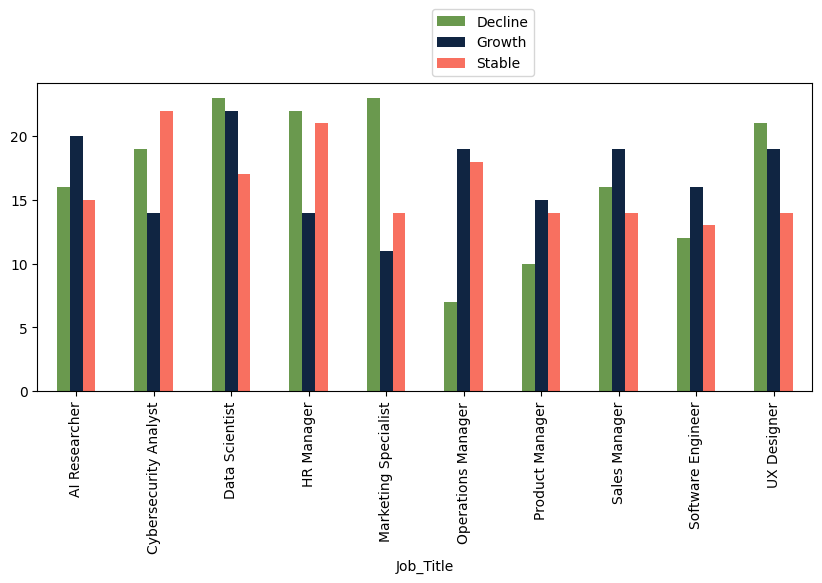

In [21]:

#The expected growth or decline in the job role during the next 5 years for each job
pd.crosstab(df.Job_Title,df.Job_Growth_Projection).plot(kind='bar',figsize=(10,4),color=['#6a994e' , '#102542' ,'#f87060'])
plt.legend(bbox_to_anchor=(0.5,1))
plt.show()

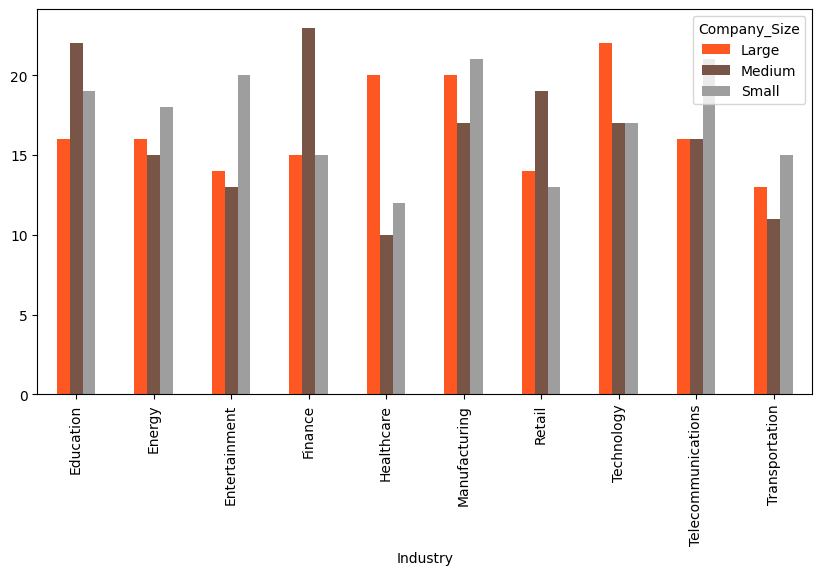

In [22]:
#The size of the company offering the job in relation to The industry in which the job is located.
pd.crosstab(df.Industry , df.Company_Size).plot(kind='bar',figsize=(10,5),color=['#FF5722','#795548','#9E9E9E'])
plt.show()

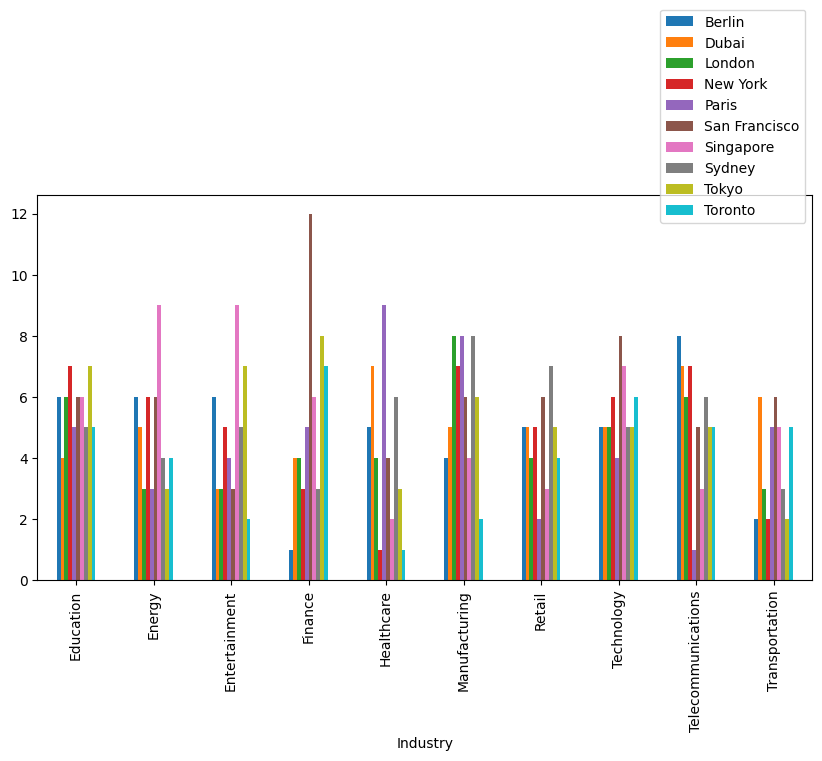

In [23]:
#The geographical location of the job in relation to industry
pd.crosstab(df.Industry, df.Location).plot(kind='bar',figsize=(10,5))
plt.legend(bbox_to_anchor=(1,1.5))
plt.show()

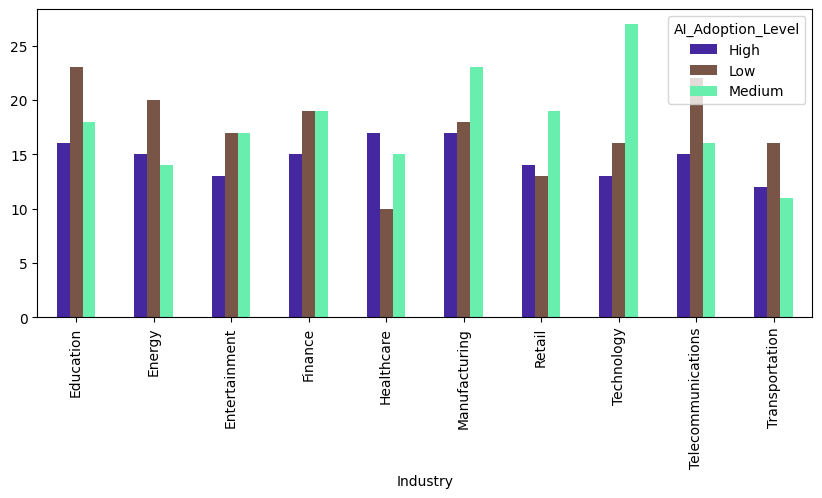

In [24]:
#The extent to which the company relies on AI in its operations industry
pd.crosstab(df.Industry , df.AI_Adoption_Level).plot(kind='bar',figsize=(10,4),color=['#4527A0','#795548','#68EFAD']) 
plt.show()

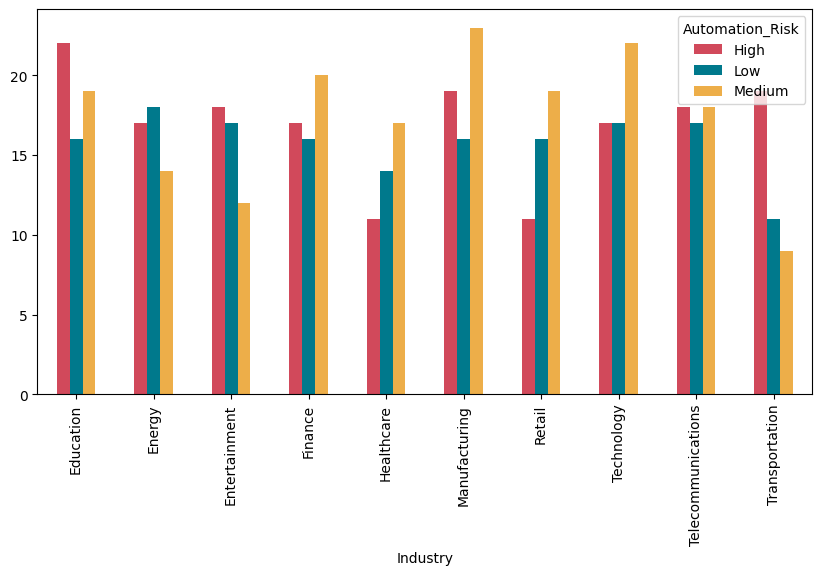

In [25]:
#The estimated risks represented by Industry 
pd.crosstab(df.Industry , df.Automation_Risk).plot(kind='bar' , figsize=(10,5),color=['#d1495b','#00798c','#edae49'])
plt.show()

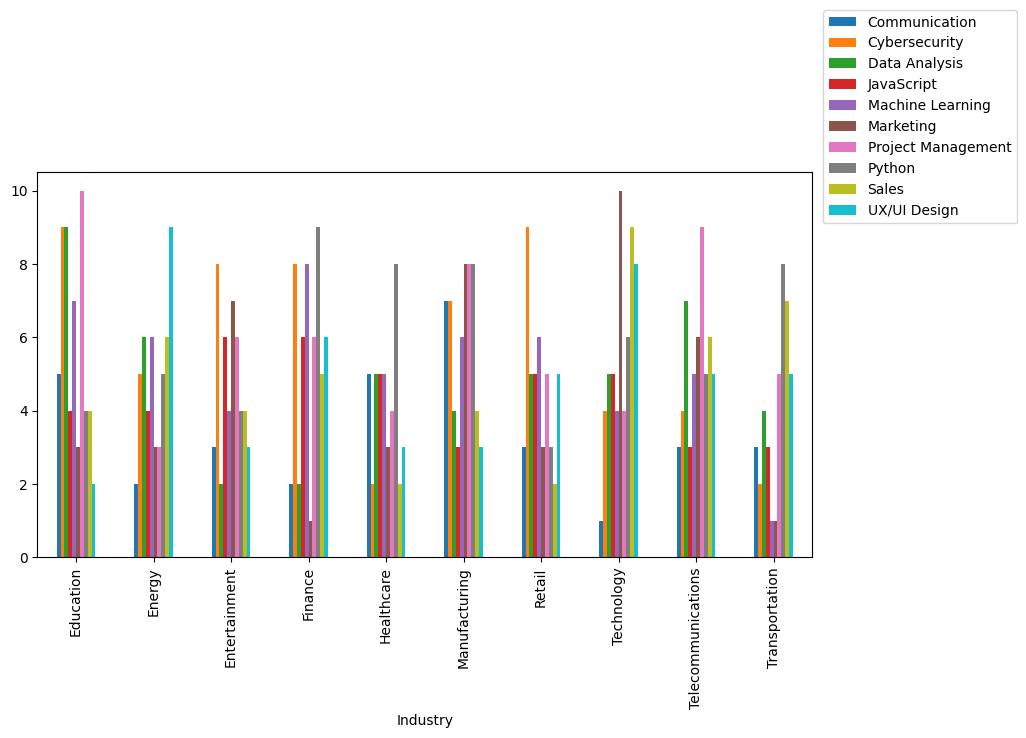

In [26]:
#Basic skills requred for the job role industry 
pd.crosstab(df.Industry,df.Required_Skills).plot(kind='bar',figsize=(10,5))
plt.legend(bbox_to_anchor=(1.005,1.44))
plt.show()

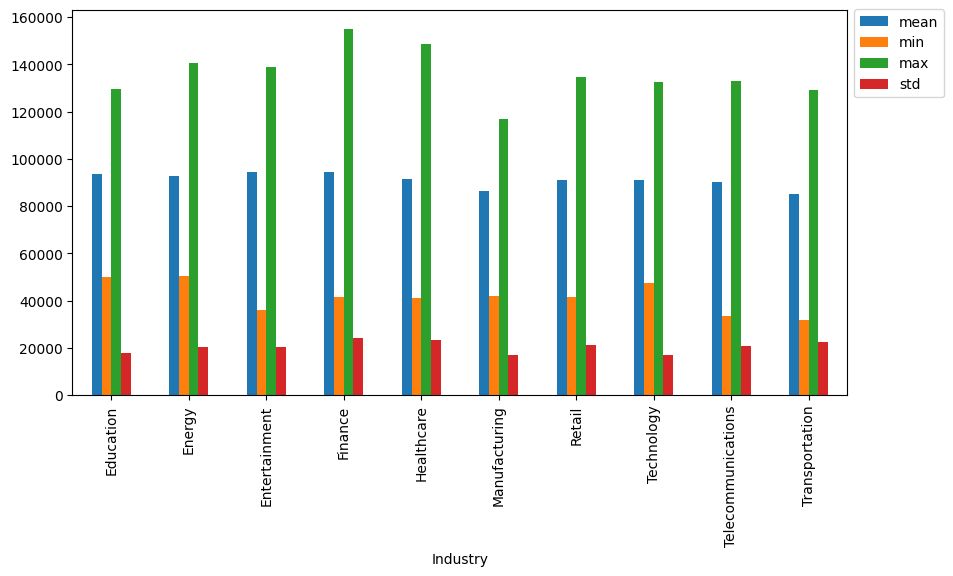

In [27]:
#The annual salary offered for the position is in US dollars per Industry 
df.groupby('Industry').Salary_USD.agg(['mean','min','max','std']).plot(kind='bar',figsize=(10,5))
plt.legend(bbox_to_anchor=(1,1.02))
plt.show()

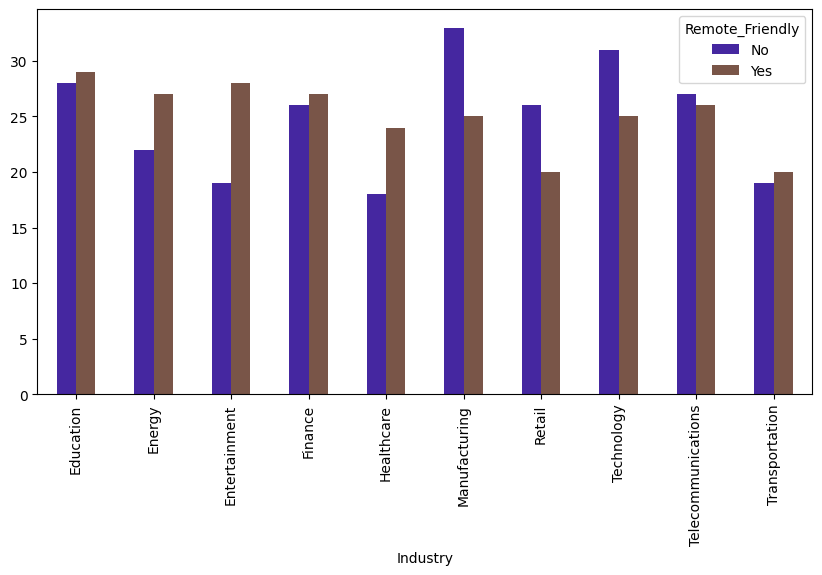

In [28]:
#Indicates wheather the task can be executed remotely for industry
pd.crosstab(df.Industry,df.Remote_Friendly).plot(kind='bar',figsize=(10,5),color=['#4527A0','#795548'])
plt.show()

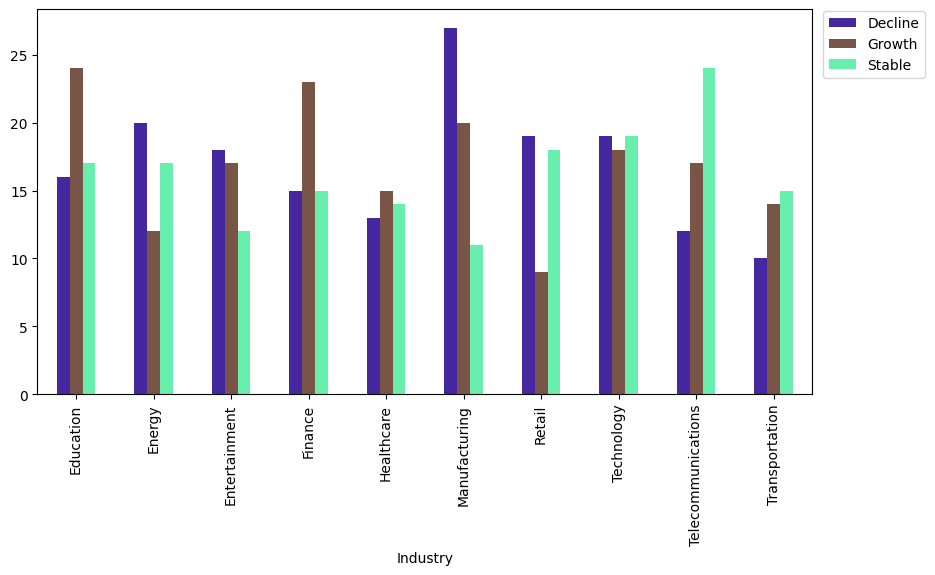

In [29]:
#The expected growth or decline in the job role during the next 5 years for each industry
pd.crosstab(df.Industry,df.Job_Growth_Projection).plot(kind='bar',figsize=(10,5),color=['#4527A0','#795548','#68EFAD'])
plt.legend(bbox_to_anchor=(1.005,1.014))
plt.show()

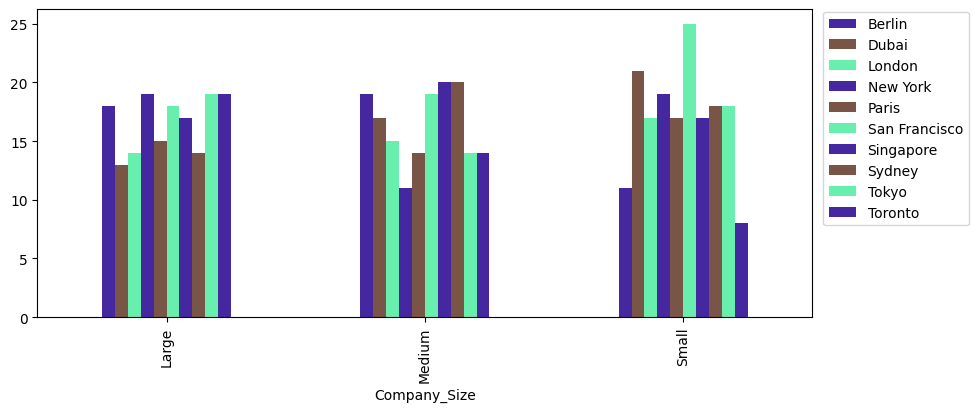

In [30]:
#The size of the company offering the job in each country
pd.crosstab(df.Company_Size,df.Location).plot(kind='bar',figsize=(10,4),color=['#4527A0','#795548','#68EFAD'])
plt.legend(bbox_to_anchor=(1.005,1.014))
plt.show()

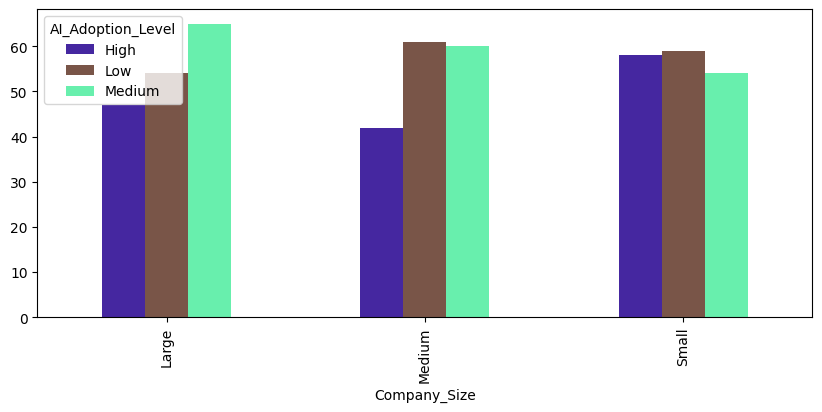

In [31]:
#The size of the company's offer in relation to the extent to which the company
#adopts AI in its operations.
pd.crosstab(df.Company_Size,df.AI_Adoption_Level).plot(kind='bar',figsize=(10,4),color=['#4527A0','#795548','#68EFAD'])
plt.show()

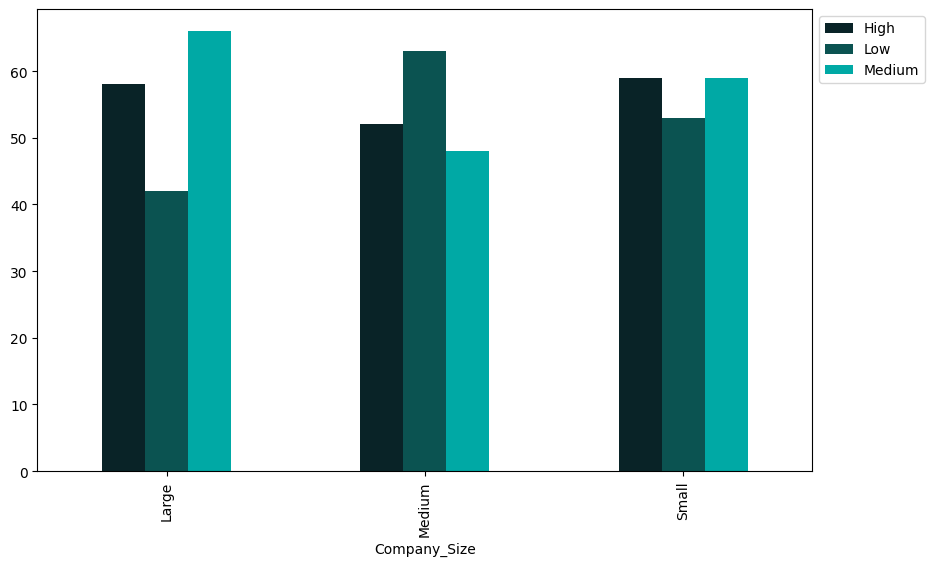

In [32]:
#The size of the company's  offer in relation to the estimated risks of the 
#possibility of automating the job during the next ten years.
pd.crosstab(df.Company_Size , df.Automation_Risk).plot(kind='bar' , figsize=(10,6) ,color=['#092327','#0b5351','#00a9a5'] )
plt.legend(bbox_to_anchor=(1, 1))
plt.show() 

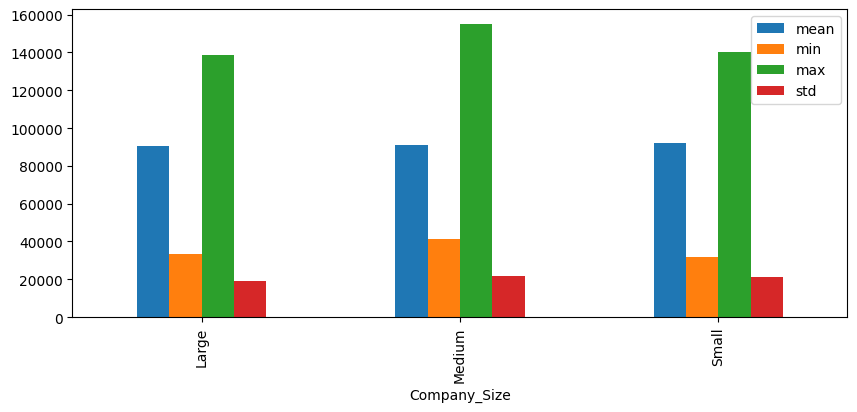

In [33]:
#The size of the company’s offer regarding the basic skills required for
#  the job role in relation to the price offered
df.groupby('Company_Size').Salary_USD.agg(['mean','min','max','std']).plot(kind='bar',figsize=(10,4))
plt.show()

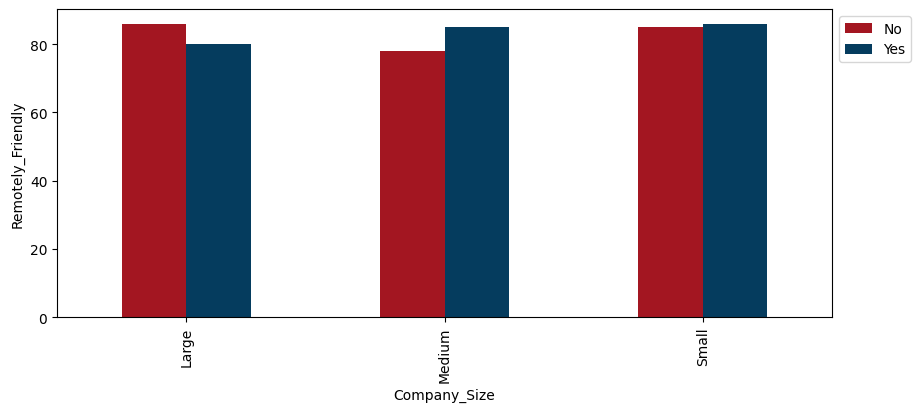

In [34]:
#The relatinship between company size and remote friendly 
pd.crosstab(df.Company_Size,df.Remote_Friendly).plot(kind='bar',figsize=(10,4),color=['#a31621','#053c5e'])
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Remotely_Friendly')
plt.show()

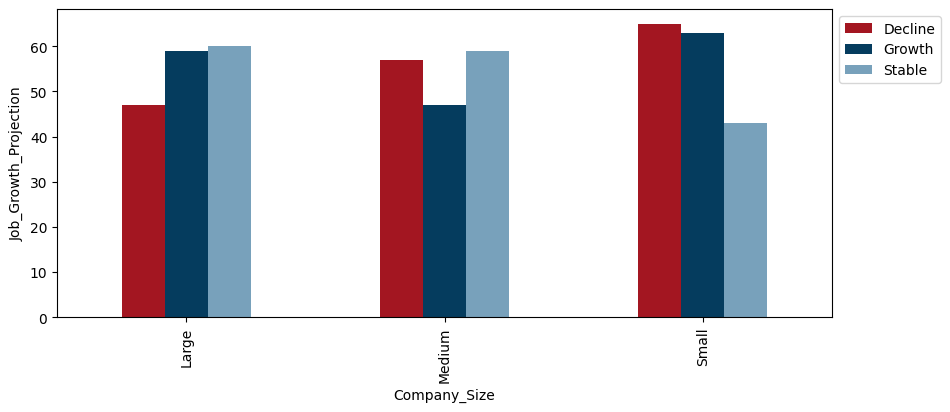

In [35]:
#The relationship between company size and the expected growth or decline in the job role 
#over the next 5 years 
pd.crosstab(df.Company_Size,df.Job_Growth_Projection).plot(kind='bar',figsize=(10,4),color=['#a31621','#053c5e' ,'#78a1bb'])
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Job_Growth_Projection')
plt.show()

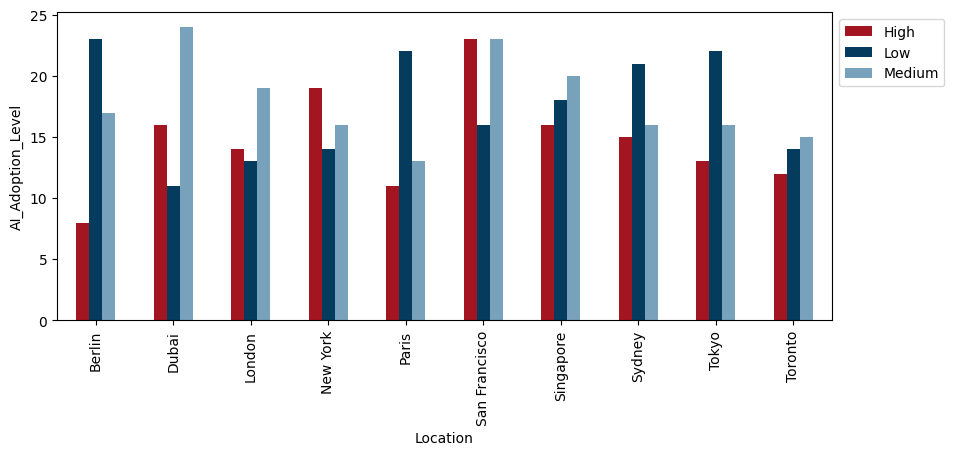

In [36]:
#The relationship between the level of adoption of artificial intelligence in each country
pd.crosstab(df.Location,df.AI_Adoption_Level).plot(kind='bar',figsize=(10,4),color=['#a31621','#053c5e','#78a1bb'])
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('AI_Adoption_Level')
plt.show()

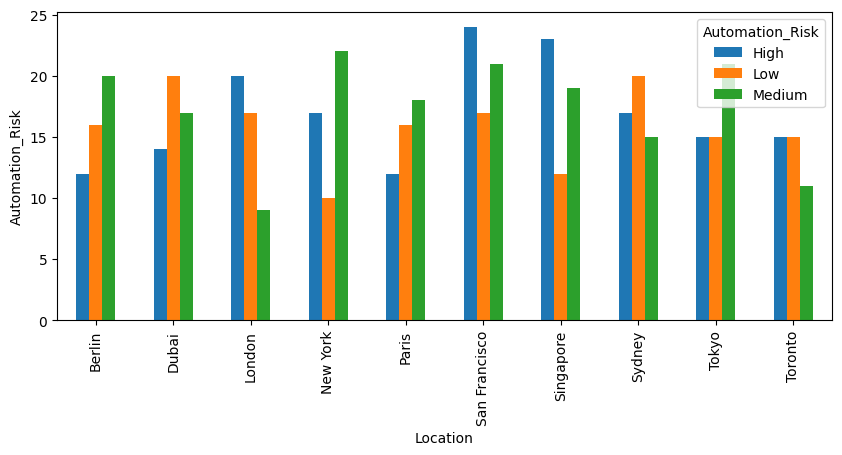

In [37]:
#The relationship between the risks of automation in each country
pd.crosstab(df.Location,df.Automation_Risk).plot(kind='bar',figsize=(10,4))
plt.ylabel('Automation_Risk')
plt.show()

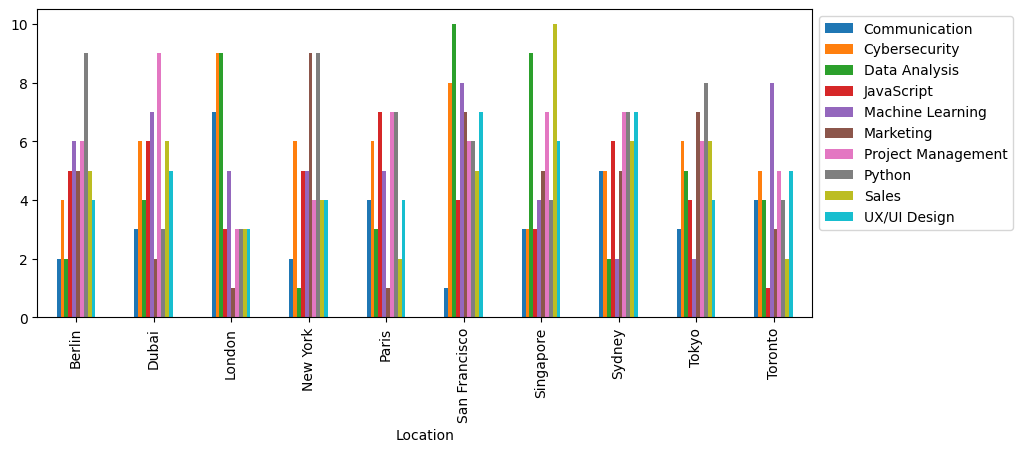

In [38]:
# The relationship between Required Skills each country
pd.crosstab(df.Location,df.Required_Skills).plot(kind='bar',figsize=(10,4))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

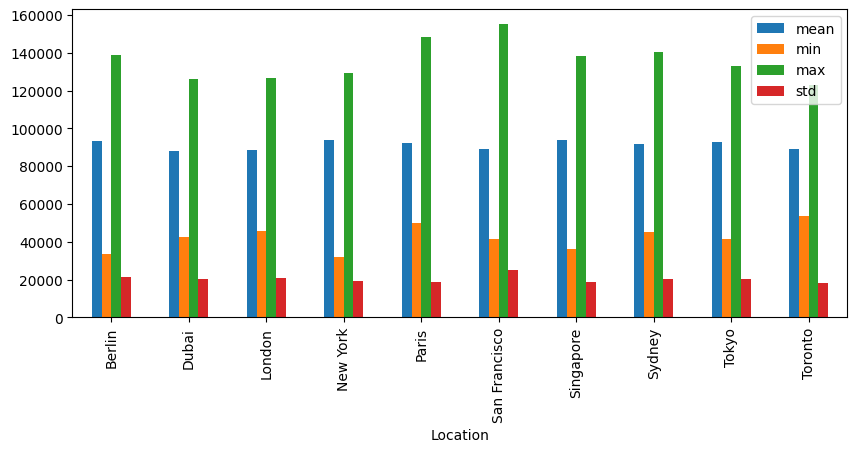

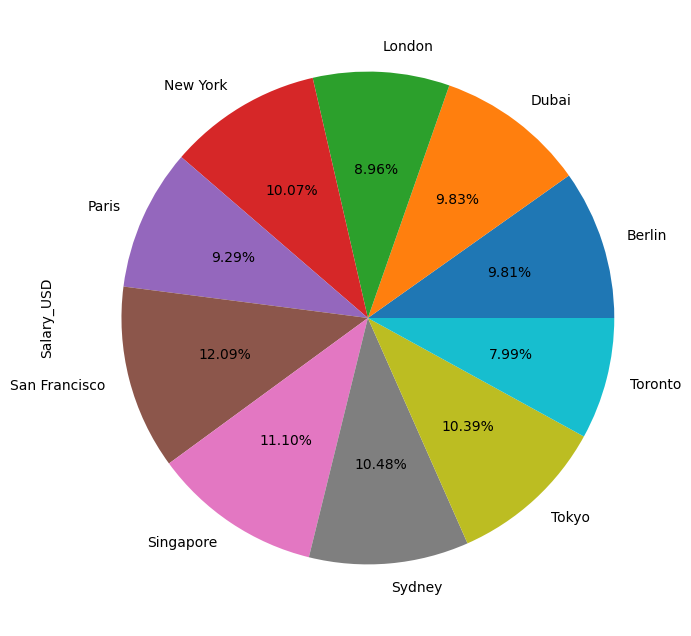

In [39]:
#Details the annual salary offered for the position is in US dollars for rach country
df.groupby('Location').Salary_USD.agg(['mean','min','max','std']).plot(kind='bar',figsize=(10,4))
plt.show()
df.groupby('Location').Salary_USD.sum().plot(kind='pie',autopct='%.2f%%',figsize=(10,8))
plt.show()

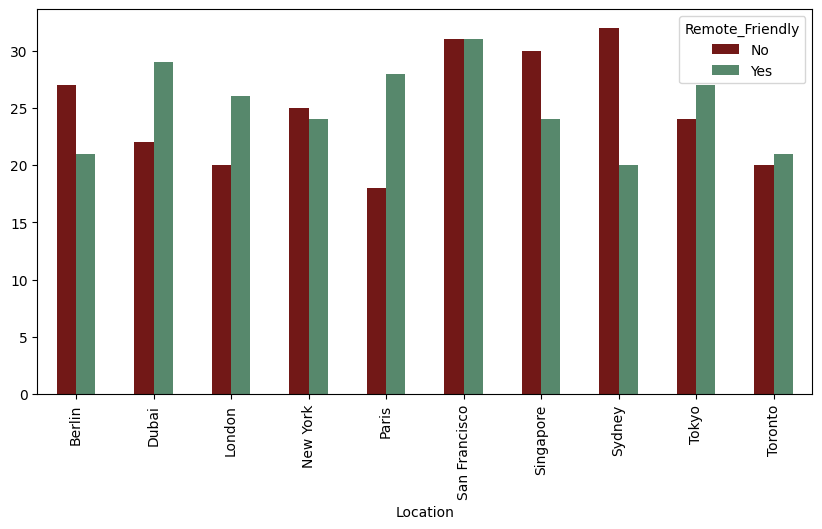

In [40]:
#THe relationship between Remote Friendly for each country 
pd.crosstab(df.Location,df.Remote_Friendly).plot(kind='bar',figsize=(10,5),color=['#721817' ,'#57886c'])
plt.show()

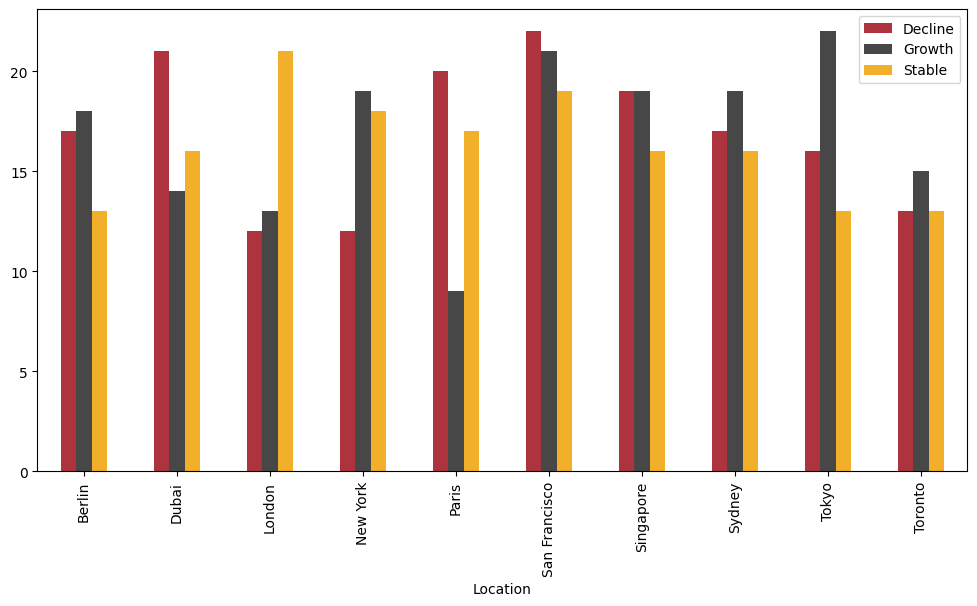

In [41]:
#The relationship between the projected growth or decline of the job role over
#the next 5 years for each country 
pd.crosstab(df.Location,df.Job_Growth_Projection).plot(kind='bar',figsize=(12,6),color=['#ad343e' , '#474747' , '#f2af29'])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

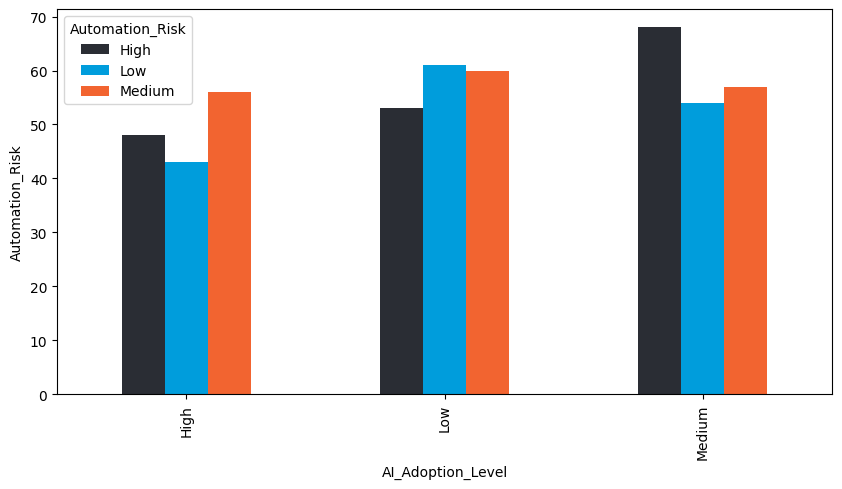

In [42]:
#The relationship between Automation Risk and AI Adoption Level
pd.crosstab(df.AI_Adoption_Level , df.Automation_Risk).plot(kind='bar',figsize=(10,5),color=['#2a2d34' , '#009ddc' , '#f26430'])
plt.xlabel('AI_Adoption_Level')
plt.ylabel('Automation_Risk')
plt.show()

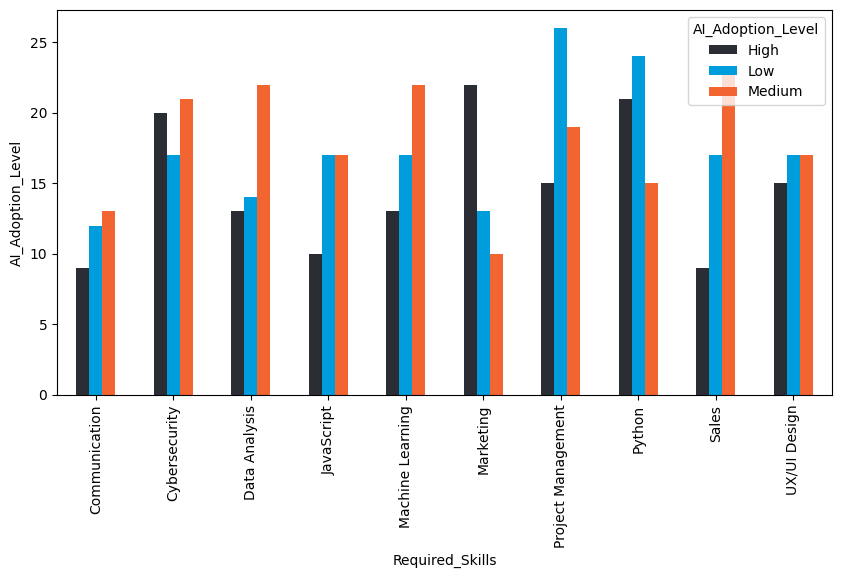

In [43]:
#The relationship between Required Skills and AI Adoption Level
pd.crosstab(df.AI_Adoption_Level,df.Required_Skills).T.plot(kind='bar',figsize=(10,5),color=['#2a2d34' , '#009ddc' , '#f26430'])
plt.ylabel('AI_Adoption_Level')
plt.show()

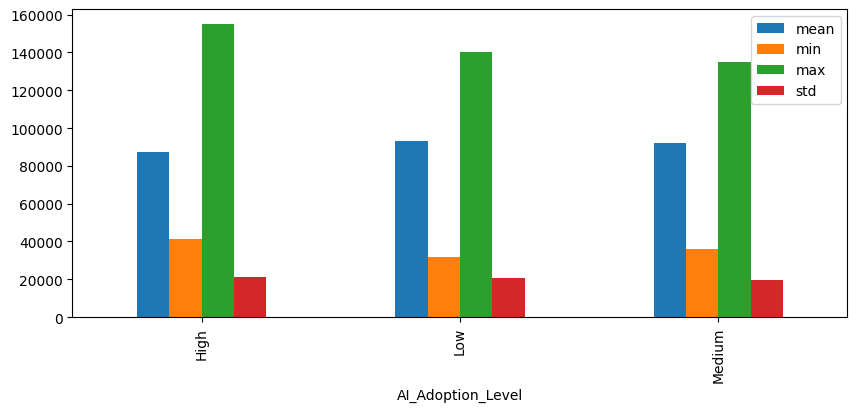

In [44]:
#Price details for The extent to which the company has adopted AI in its operations
df.groupby('AI_Adoption_Level').Salary_USD.agg(['mean','min','max','std']).plot(kind='bar',figsize=(10,4))
plt.show()

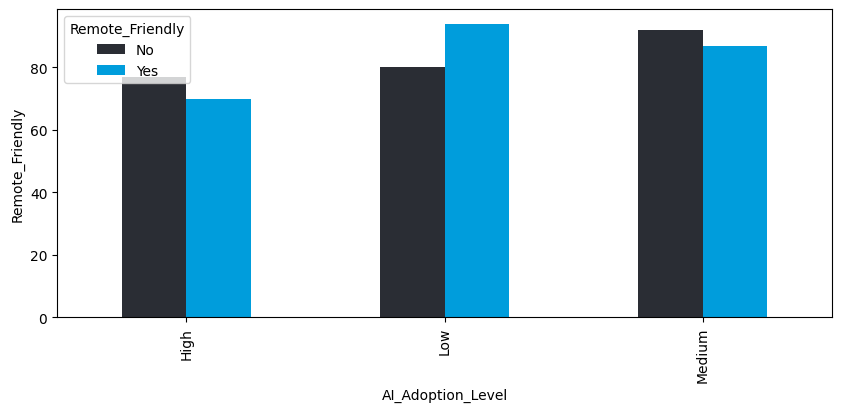

In [45]:
#The relationship between Remote Friendly and AI Adoption Level 
pd.crosstab(df.AI_Adoption_Level,df.Remote_Friendly).plot(kind='bar',figsize=(10,4),color=['#2a2d34' , '#009ddc' ])
plt.ylabel('Remote_Friendly')
plt.show()

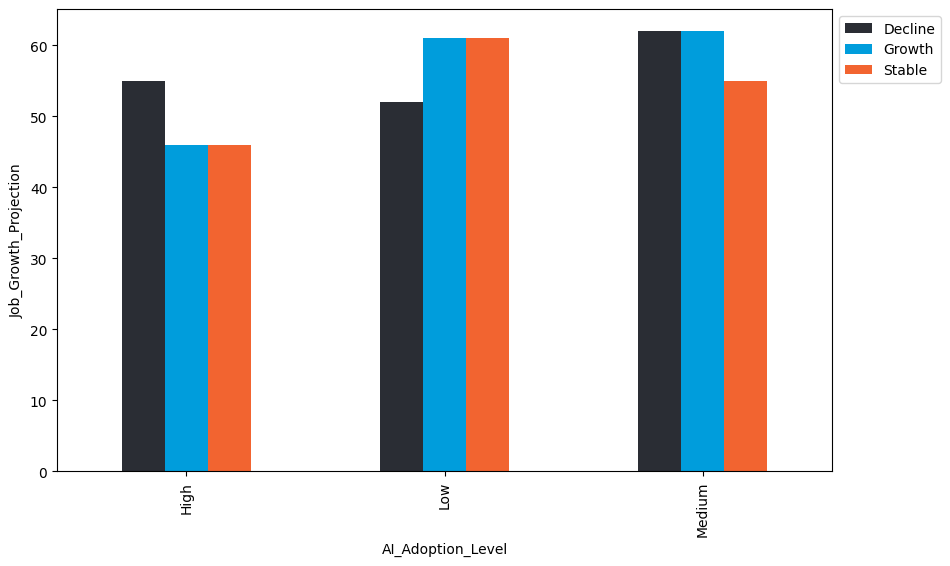

In [46]:
#The relationship between Job Growth Projection and AI Adoption Level
pd.crosstab(df.AI_Adoption_Level , df.Job_Growth_Projection).plot(kind='bar' , figsize=(10,6), color=['#2a2d34' , '#009ddc' , '#f26430'])
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Job_Growth_Projection')
plt.show()

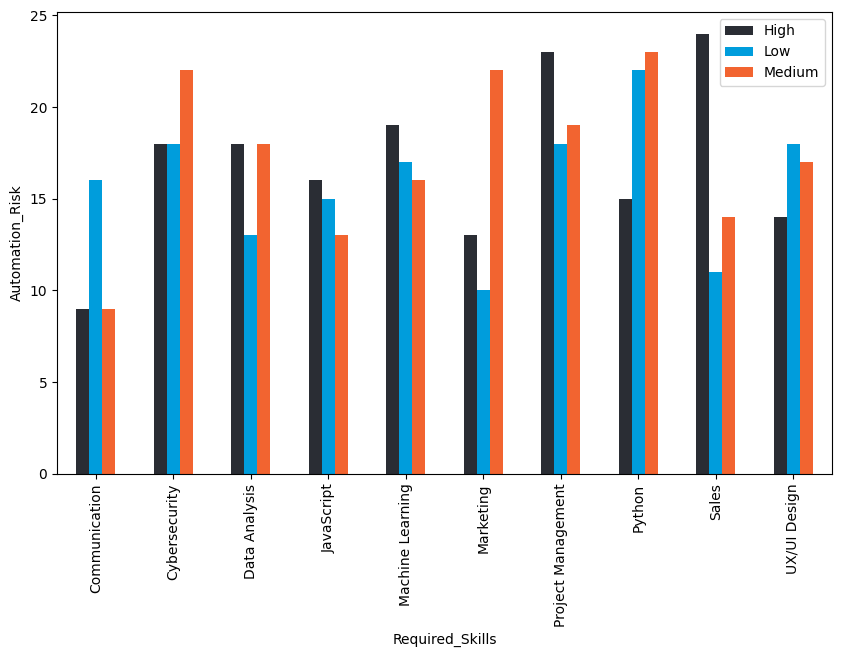

In [47]:
#The relationship between Automation Risk and Required Skills
pd.crosstab(df.Automation_Risk , df.Required_Skills).T.plot(kind='bar' , figsize=(10,6), color=['#2a2d34' , '#009ddc' , '#f26430'])
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Automation_Risk')
plt.show()

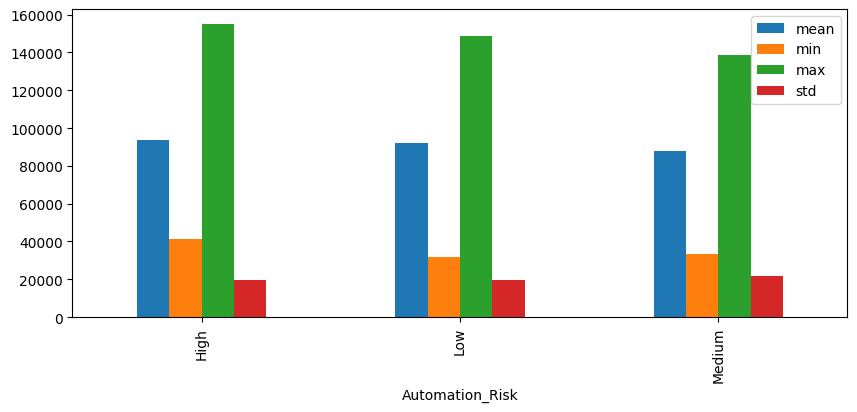

In [48]:
#Details of prices in relation to the estimated risks of 
# the possibility of automating the job during the next ten years
df.groupby('Automation_Risk').Salary_USD.agg(['mean','min','max','std']).plot(kind='bar',figsize=(10,4))
plt.show()

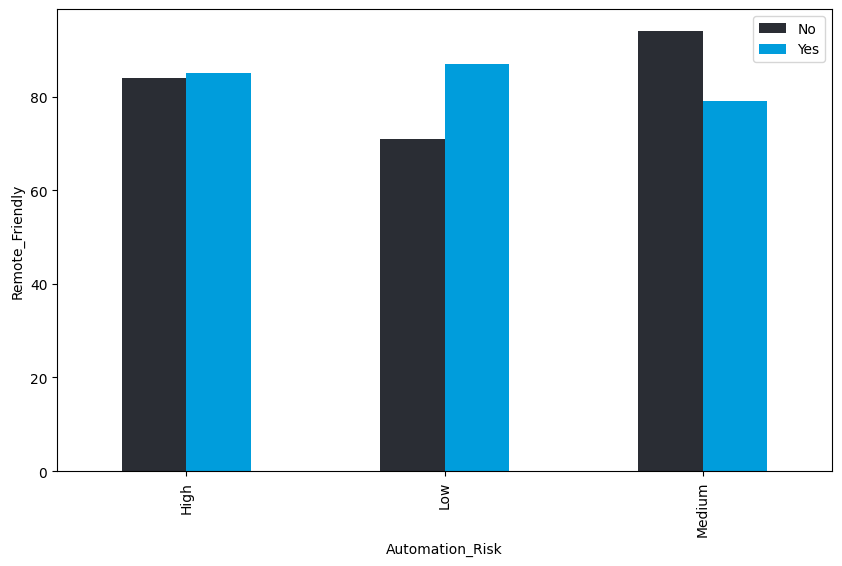

In [49]:
#The relationship between Automation Risk and Remote Friendly
pd.crosstab(df.Automation_Risk , df.Remote_Friendly).plot(kind='bar' , figsize=(10,6), color=['#2a2d34' , '#009ddc'])
plt.ylabel('Remote_Friendly')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

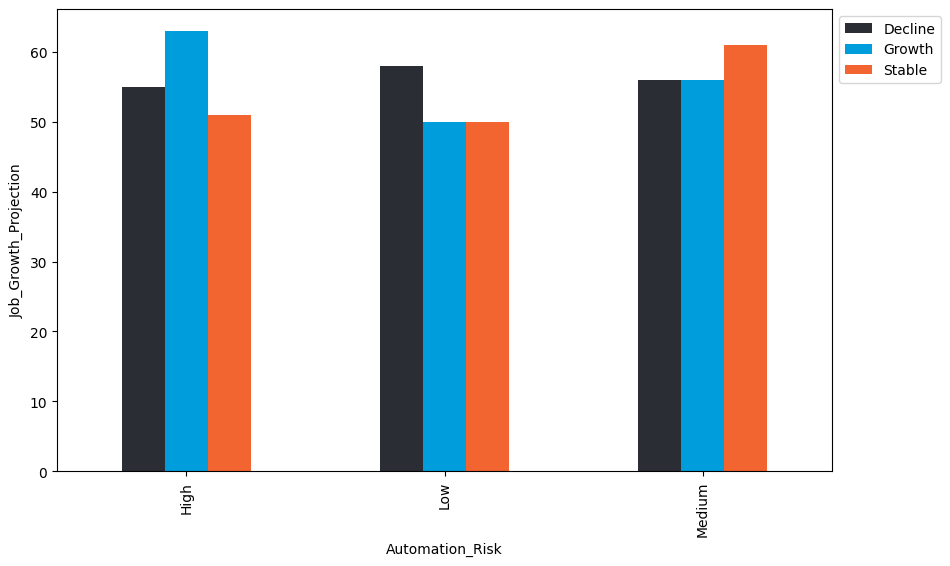

In [50]:
#The relationship between Automation Risk and Job Growth Projection
pd.crosstab(df.Automation_Risk , df.Job_Growth_Projection).plot(kind='bar' , figsize=(10,6), color=['#2a2d34' , '#009ddc' , '#f26430'])
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Job_Growth_Projection')
plt.show()

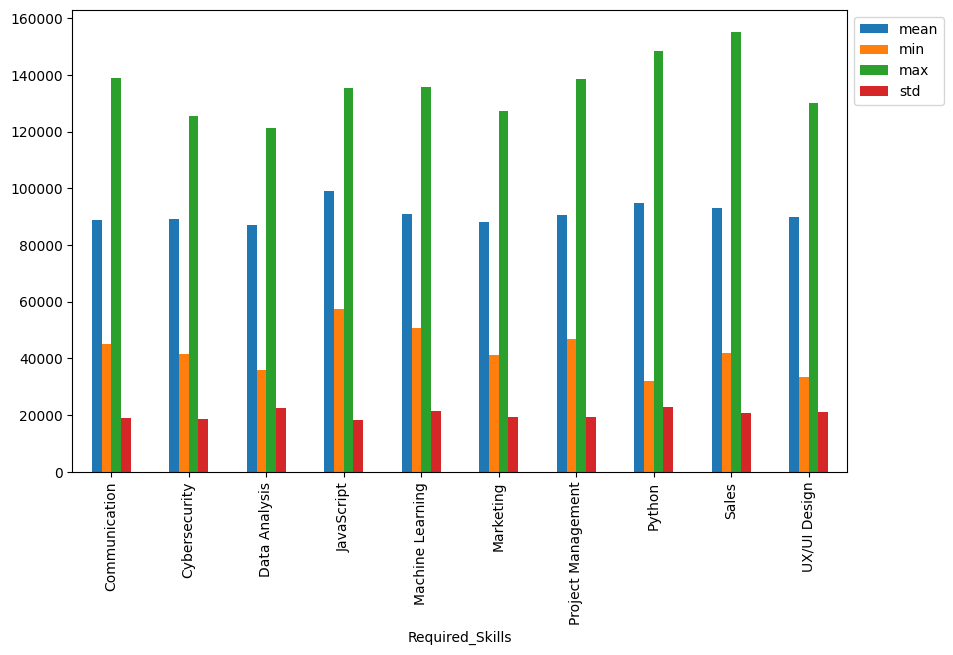

In [51]:
#Details of prices in relation to The key skills required for the job role
df.groupby('Required_Skills').Salary_USD.agg(['mean','min','max','std']).plot(kind='bar' , figsize=(10,6))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

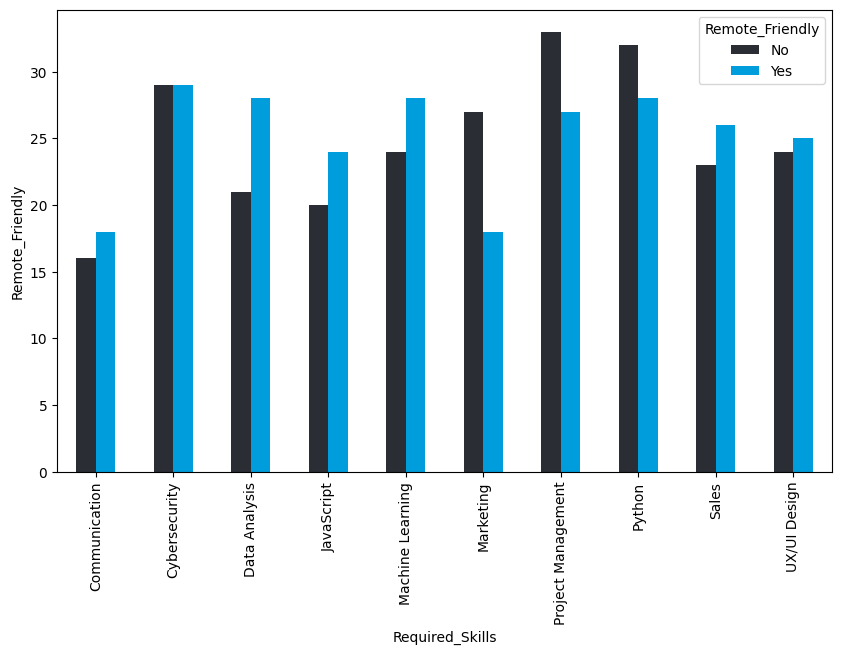

In [52]:
#The relationship between Required Skills and Remote Friendly
pd.crosstab(df.Required_Skills , df.Remote_Friendly).plot(kind='bar' , figsize=(10,6), color=['#2a2d34' , '#009ddc' ])
plt.ylabel('Remote_Friendly')
plt.show()

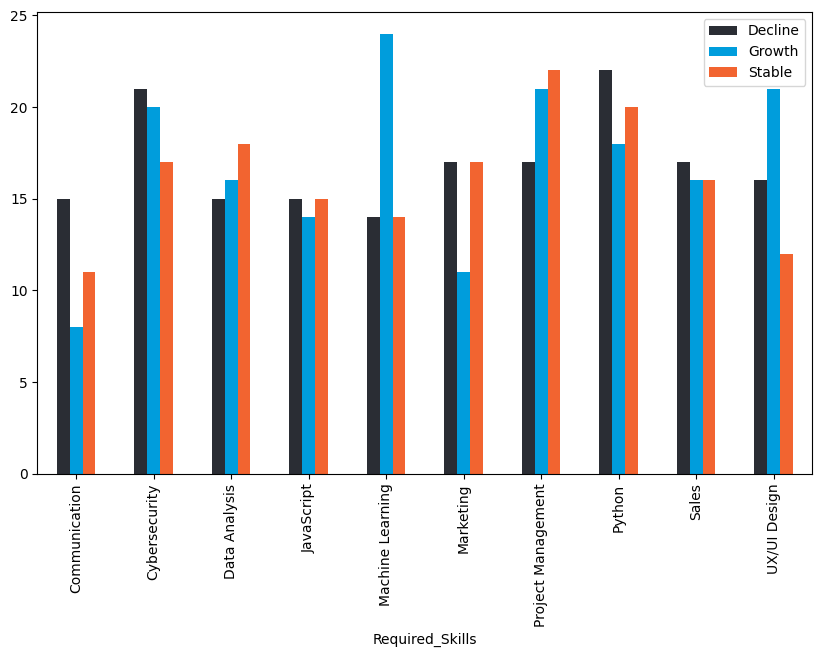

In [53]:
#The relationship between Required Skills and Job Growth Projection
pd.crosstab(df.Required_Skills , df.Job_Growth_Projection).plot(kind='bar' , figsize=(10,6), color=['#2a2d34' , '#009ddc' , '#f26430'])
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

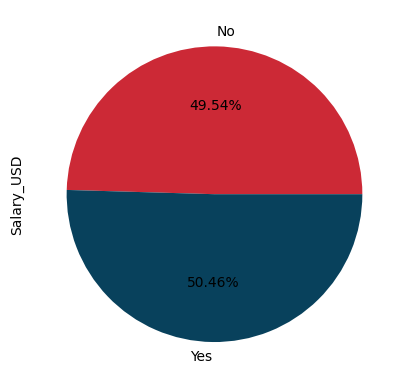

In [54]:

#Details of prices in relation to Indicates whether the job be performed remotely.
df.groupby('Remote_Friendly').Salary_USD.sum().plot(kind='pie' ,autopct='%.2f%%' ,colors=[ '#cc2936' , '#08415c'] )
plt.show()

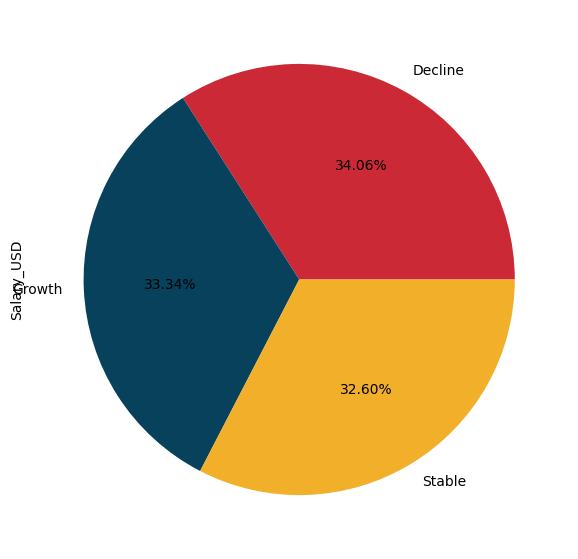

In [55]:
#Details of prices in relation to The projected growth or
#  decline of the job role over the next five years
df.groupby('Job_Growth_Projection').Salary_USD.sum().plot(kind='pie' ,autopct='%.2f%%' ,colors=[ '#cc2936' , '#08415c' , '#f2af29'] , figsize=(10,7))
plt.show()